# **Task 3: EDA for sellers and customers**

In [39]:
# Data processing
import pandas as pd
import numpy as np

In [40]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [41]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None

In [42]:
# Increase default figure and font sizes for easier viewing.
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## **Data importing and cleaning**

In [17]:
# This time we are going to import dataframe in an appropriate data types format
data_all_agg = pd.read_csv('data_raw/data_all_agg.csv', 
                           index_col=0,
                           dtype = {'order_id': str, 
                                    'seller_id': str, 
                                    'order_item_id': int, 
                                    'price': float, 
                                    'freight_value': float, 
                                    'product_weight_g':float, 
                                    'product_volume': float,
                                    'customer_city':str,
                                    'customer_state':str,
                                    'customer_lat': float,
                                    'customer_lng':float,
                                    'seller_city':str,
                                    'seller_state':str,
                                    'seller_lat': float,
                                    'seller_lng':float,
                                    'distance_km':float,
                                    'delivery_time':float,
                                    'delivery_speed':float},
                           parse_dates=['order_purchase_timestamp',
                                         'order_approved_at',
                                         'shipping_limit_date',
                                         'order_delivered_carrier_date',
                                         'order_delivered_customer_date',
                                         'order_estimated_delivery_date'])

In [18]:
# Check dtypes
data_all_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94653 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   seller_id                      94653 non-null  object        
 1   order_item_id                  94653 non-null  int32         
 2   price                          94653 non-null  float64       
 3   freight_value                  94653 non-null  float64       
 4   product_weight_g               94653 non-null  float64       
 5   product_volume                 94653 non-null  float64       
 6   customer_city                  94653 non-null  object        
 7   customer_state                 94653 non-null  object        
 8   customer_lat                   94653 non-null  float64       
 9   customer_lng                   94653 non-null  float64       
 10  seller_city                  

In [19]:
data_all_agg[data_all_agg.seller_id == "f664f98bfda2eaf266a23ff144e7a872"]

,seller_id,order_item_id,price,freight_value,product_weight_g,product_volume,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_km,delivery_time_hours,delivery_time_days,delivery_speed_km_per_hour
order_id,,,,,,,,,,,,,,,,,,,,,,,,
5f9d46795c3126674e52becb3a1a517f,f664f98bfda2eaf266a23ff144e7a872,2,119.0,0.03,1600.0,27200.0,mogi das cruzes,SP,-23.528928,-46.171651,sao paulo,SP,-23.572939,-46.651115,2017-07-18 11:48:20,2017-07-18 12:03:29,2017-07-24 12:03:29,2017-07-20 23:03:42,2017-07-20 18:52:41,2017-07-31,49.12,55.0725,2.294688,0.891915


## **Sellers delivery analysis**

In [21]:
data_seller_del_sp.to_csv('data_raw/data_sellers_del_sp.csv')

In [20]:
# create frame with top 
data_seller_del_sp = data_all_agg.groupby('seller_id').agg({'delivery_speed_km_per_hour':'mean'}).sort_values(by=['delivery_speed_km_per_hour'], ascending=False).reset_index()
data_seller_del_sp

,seller_id,delivery_speed_km_per_hour
0,fa5fdc4e4bb6bd1009ad0e4ac4096562,13.722023
1,28872dc528e978a639754bc8c2ce5a4c,12.941696
2,eb9267cccc90f1b49c8d2f9887c7dd97,11.345783
3,e73bf2cea7fe4b0b4d287a7568ed1099,10.958579
4,17998cf586426bf0f2c3726cb0a4b211,10.715573
...,...,...
2891,9e94fa26a70ede4d26226e918e8706a2,0.025542
2892,2235cf78d3e2073a88146a9cb60f0dd0,0.023977
2893,3442033154be05bac582e173ef54fd12,0.021439
2894,baf15155e37ef5492731459bdc05be8a,0.004929


In [22]:
data_all_agg.delivery_time_hours.sort_values()

order_id
1d893dd7ca5f77ebf5f59f0d2017eee0      12.801944
434cecee7d1a65fc65358a632b6f725f      18.752778
f3c6775ba3d2d9fe2826f93b71f12008      20.527500
8339b608be0d84fca9d8da68b58332c3      20.722222
bb5a519e352b45b714192a02ffe25681      21.378056
                                       ...     
285ab9426d6982034523a855f55a885e    4671.206667
2fb597c2f772eca01b1f5c561bf6cc7b    4676.404167
440d0d17af552815d15a9e41abe49359    4695.216389
1b3190b2dfa9d789e1f14c05b647a14a    5000.442222
ca07593549f1816d26a572e06dc1eab6    5031.086667
Name: delivery_time_hours, Length: 94653, dtype: float64

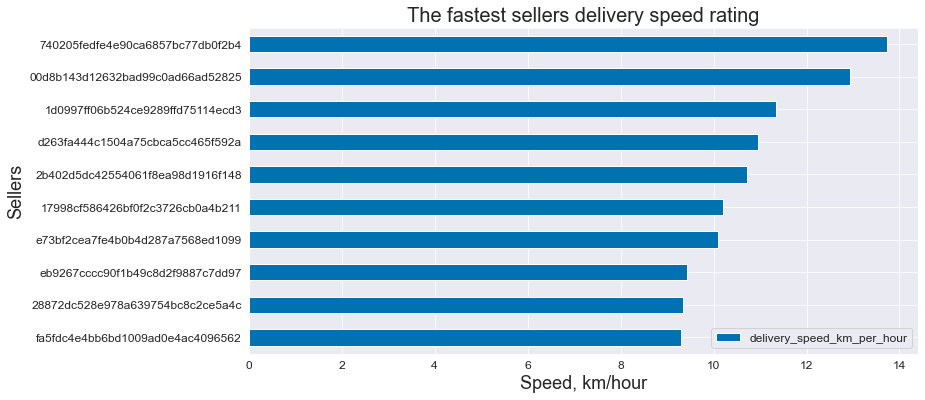

In [24]:
data_seller_del_sp.sort_values(by=['delivery_speed_km_per_hour'])[-10:].plot(kind='barh')
plt.title('The fastest sellers delivery speed rating', fontsize=20)
plt.xlabel('Speed, km/hour', fontsize=18)
plt.ylabel('Sellers', fontsize=18)
plt.yticks([0, 1, 2, 3, 4 ,5, 6 ,7 ,8, 9], data_seller_del_sp.seller_id[:10])  # Set text labels and properties.
plt.show();

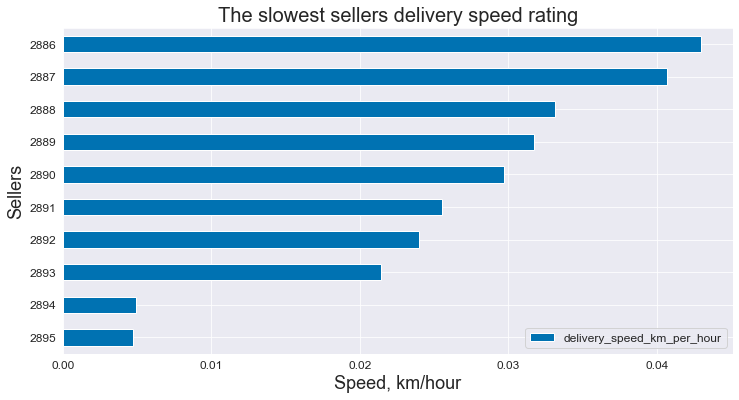

In [28]:
data_seller_del_sp.sort_values(by='delivery_speed_km_per_hour', ascending=True)[:10].plot(kind='barh')
plt.title('The slowest sellers delivery speed rating', fontsize=20)
plt.xlabel('Speed, km/hour', fontsize=18)
plt.ylabel('Sellers', fontsize=18)
# plt.yticks([0, 1, 2, 3, 4 ,5, 6 ,7 ,8, 9], data_seller_del_sp.seller_id[:])  # Set text labels and properties.
plt.show();

## **Sellers and customers delivery time and speed analysis**

To capture critical geo points, we need to visualize them on the map. Only for this purpose we have to filter below the average delivery time and delivery speed

In [29]:
mean_del_time = data_all_agg.delivery_time_hours.mean()
mean_del_speed = data_all_agg.delivery_speed_km_per_hour.mean()

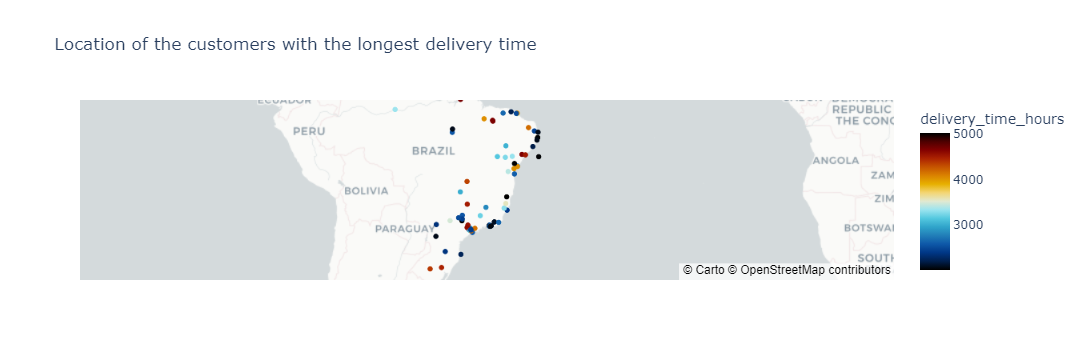

In [43]:
# Visualize the longest delivery time for customers
fig = px.scatter_mapbox(data_all_agg[data_all_agg.delivery_time_hours > 2000], 
                        lat="customer_lat", 
                        lon="customer_lng", 
                        color="delivery_time_hours", 
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=30, zoom=2,
                        mapbox_style="carto-positron",
                        title='Location of the customers with the longest delivery time')
fig.show()

In [44]:
# Check regions with the slowest delivery to customers
data_all_agg[data_all_agg.delivery_time_hours > 2000]['customer_state'].value_counts()

SP    22
RJ    21
BA    11
ES     5
CE     5
PE     4
PA     3
MG     3
RS     2
PR     2
PB     2
SC     2
GO     2
SE     2
PI     2
RN     1
MA     1
AL     1
AP     1
AM     1
RR     1
Name: customer_state, dtype: int64

In [45]:
# Check regions with the slowest delivery to customers
data_all_agg[data_all_agg.delivery_time_hours > 2000]['customer_city'].value_counts()[:5]

rio de janeiro    14
sao paulo          7
salvador           3
teresina           2
fortaleza          2
Name: customer_city, dtype: int64

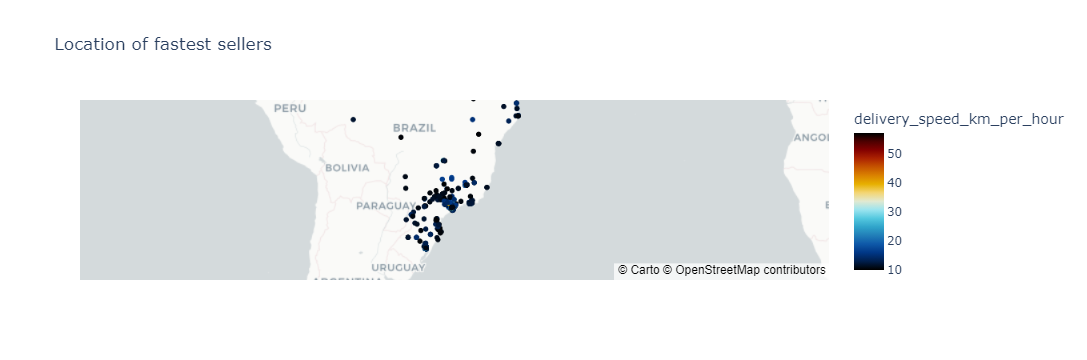

In [46]:
# Visualize the fastest sellers
fig = px.scatter_mapbox(data_all_agg[data_all_agg.delivery_speed_km_per_hour > 10], 
                        lat="seller_lat", 
                        lon="seller_lng", 
                        color="delivery_speed_km_per_hour", 
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=2,
                        mapbox_style="carto-positron",
                        title='Location of fastest sellers')
fig.show()

In [48]:
# Check region with the fastest sellers
data_all_agg[data_all_agg.delivery_speed_km_per_hour > 10]['seller_state'].value_counts()

SP    398
RS     61
MA     48
MG     47
PE     45
PR     42
SC     20
RJ     17
CE      8
BA      7
DF      5
PB      3
GO      3
RN      3
RO      2
ES      2
MS      2
PI      1
MT      1
Name: seller_state, dtype: int64

In [50]:
# Check region with the fastest sellers
data_all_agg[data_all_agg.delivery_speed_km_per_hour > 10]['seller_city'].value_counts()[:5]

sao paulo         209
sao luis           48
recife             43
belo horizonte     26
curitiba           23
Name: seller_city, dtype: int64

### **Correlation between delivery speed and time**

In [51]:
data_all_agg.head(2)

,seller_id,order_item_id,price,freight_value,product_weight_g,product_volume,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_km,delivery_time_hours,delivery_time_days,delivery_speed_km_per_hour
order_id,,,,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,1,58.9,13.29,650.0,3528.0,campos dos goytacazes,RJ,-21.762775,-41.309633,volta redonda,SP,-22.496953,-44.127492,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,301.50,182.746111,7.614421,1.649830
00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,1,239.9,19.93,30000.0,60000.0,santa fe do sul,SP,-20.220527,-50.903424,sao paulo,SP,-23.565096,-46.518565,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-03 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,585.56,389.188333,16.216181,1.504567


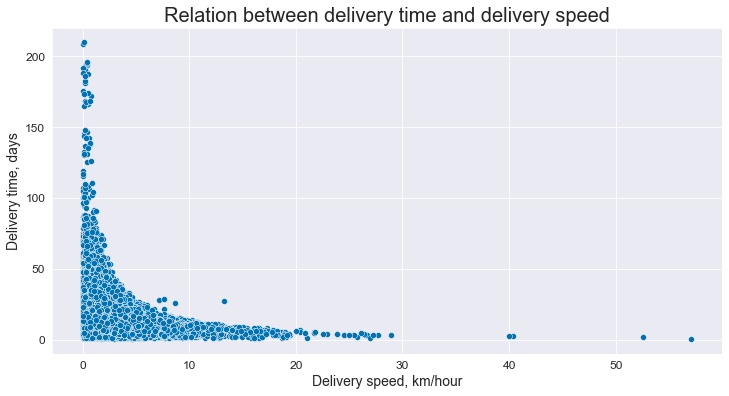

In [52]:
sns.scatterplot(x=data_all_agg.delivery_speed_km_per_hour, y=data_all_agg.delivery_time_days);
plt.title('Relation between delivery time and delivery speed', fontsize=20)
plt.xlabel('Delivery speed, km/hour', fontsize=14)
plt.ylabel('Delivery time, days', fontsize=14)
plt.show();

In [53]:
from scipy import stats

In [55]:
stats.spearmanr(data_all_agg.delivery_speed_km_per_hour, data_all_agg.delivery_time_days)

SpearmanrResult(correlation=0.028254711764683558, pvalue=3.48702539308878e-18)

In [56]:
stats.pearsonr(data_all_agg.delivery_speed_km_per_hour, data_all_agg.delivery_time_days)

(-0.09958096749839883, 3.844299973694803e-207)

In [57]:
stats.kendalltau(data_all_agg.delivery_speed_km_per_hour, data_all_agg.delivery_time_days)

KendalltauResult(correlation=0.006212553074059331, pvalue=0.004144461085613878)

### **Notes**

Клієнт додатково просив провести аналіз рангової кореляції між швидкістю доставки та часом доставки.